# <a id='toc1_'></a>[Projet 1 : Participez  un concours sur la smart City](#toc0_)

![image.png](https://www.notre-planete.info/actualites/images/infrastructures/arbres-Paris.jpg)

**Table of contents**<a id='toc0_'></a>    
- [Projet 1 : Participez  un concours sur la smart City](#toc1_)    
  - [Contexte et règle : Concours Smart City](#toc1_1_)    
  - [Analyse des données](#toc1_2_)    
    - [Importation des librairies](#toc1_2_1_)    
    - [Importation du jeu de données (via fichier ou api)](#toc1_2_2_)    
    - [1ère Inspection du dataset](#toc1_2_3_)    
    - [Vérification des duplicatas](#toc1_2_4_)    
    - [Arbre remarquable](#toc1_2_5_)    
    - [Normalisation noms des colonnes et des variables](#toc1_2_6_)    
    - [Valeurs abérantes (outlier detection)](#toc1_2_7_)    
  - [Analyse graphique](#toc1_3_)    
  - [Analyse Cartographique](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Contexte et règle : Concours Smart City](#toc0_)
Vous avez décidé de participer à un challenge proposé par la ville de Paris ! Voici le cahier des charges du challenge, que vous avez trouvé sur le site :

Dans ce challenge, ouvert à tous, vous allez réaliser une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

Vos résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville. Eh oui, moins de tournées signifie moins de trajets, et plus d’arbres entretenus.

Vous aurez ainsi un impact réel sur le futur de la ville de Paris !

**Données**: 

Téléchargez le jeu de données des arbres de la ville de Paris. Vous pouvez aussi le consulter dans son contexte sur [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/information/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86838,2.30953&basemap=jawg.streets) 

**Règles du challenge** :

- Si ce n’est pas fait, installez votre environnement de développement sur votre ordinateur, et créez un environnement virtuel dédié à ce challenge.
- Les données doivent être explorées à l’aide de Python et de ses librairies. 
- Vous soumettrez votre analyse sous forme de présentation, contenant les informations suivantes :
- Présentation générale du jeu de données
- Démarche méthodologique d’analyse de données 
- Synthèse de l’analyse de données

- Le second livrable prendra la forme d’un Notebook Jupyter. 
Le Notebook sera documenté pour expliciter les différents traitements, calculs ou graphiques que vous effectuez en utilisant les fonctionnalités d’édition de texte de Jupyter. Vos explications doivent permettre à un public non technique de comprendre les différentes étapes de votre analyse et votre synthèse.

## <a id='toc1_2_'></a>[Analyse des données](#toc0_)

### <a id='toc1_2_1_'></a>[Importation des librairies](#toc0_)

In [1]:
# Library Import
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import numpy as np
from scipy.stats import zscore

### <a id='toc1_2_2_'></a>[Importation du jeu de données (via fichier ou api)](#toc0_)

In [2]:
# Read csv dataset from folder 'dataset' contain CSV with separator ;
df_arbre = pd.read_csv('dataset/les-arbres.csv',sep=";")
# See all columns when use function display
pd.set_option('display.max_columns', None)

In [3]:
# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL


api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/les-arbres/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_arbre = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)


<Response [200]>


### <a id='toc1_2_3_'></a>[1ère Inspection du dataset](#toc0_)

Nous allons vérifier que notre Dataframe c'est bien chargé en affichant les deux première ligne de notre Dataframe **df_arbre**

In [4]:
# View 2 first row of dataframe
df_arbre.head(2)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,227234,Arbre,Alignement,PARIS 17E ARRDT,N°28,NaN,BOULEVARD DE DOUAUMONT,000202024,Peuplier,Populus,alba,''Raket'',100,12,Adulte,NON,"48.89525391341141, 2.3061178777822007"
1,229862,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,JARDIN DE L ESPLANADE DES GRANDS MOULINS / 8 R...,000202016,Chêne,Quercus,rubra,NaN,0,0,NaN,NON,"48.82937805899925, 2.380738681940073"


Regardons maintenant combien de lignes et de colonnes nous avons dans notre dataframe

In [5]:
# See the shape of dataframe
f"Notre dataset contient {df_arbre.shape[0]} lignes et {df_arbre.shape[1]} colonnes pour décrire nos données."

'Notre dataset contient 207641 lignes et 17 colonnes pour décrire nos données.'

Vérifions si les types des données des colonnes sont appropriés

In [6]:
# See types of values in the dataframe
df_arbre.dtypes

idbase                  int64
typeemplacement        object
domanialite            object
arrondissement         object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
dtype: object

Pandas a bien converti nos données dans le bon type il n'aura pas de conversion sur le types de données à faire

Regardons maintenant le taux de valeurs manquantes dans chaque colonnes

In [7]:
# See Nan values on dataframe
df_arbre.isna().mean()

idbase                0.000000
typeemplacement       0.000000
domanialite           0.000000
arrondissement        0.000000
complementadresse     0.716068
numero                1.000000
adresse               0.000000
idemplacement         0.000000
libellefrancais       0.005803
genre                 0.000010
espece                0.011934
varieteoucultivar     0.808723
circonferenceencm     0.000000
hauteurenm            0.000000
stadedeveloppement    0.225399
remarquable           0.107060
geo_point_2d          0.000000
dtype: float64

### Suppression des colonnes inutiles

Observation sur les valeurs manquantes : 
- La colonne **typeemplacement** contient seulement mention 'Arbre' pour chaque valeur (colonne à supprimer)
- La colonne **numero** contient que des valeurs nulles (colonne à supprimer)
- La colonne **complementadresse** contient **72%** de valeurs nulle, cette colonne ne nous servira pas pour notre analyse (colonne à supprimer)

In [8]:
df_arbre.drop(['typeemplacement','numero','complementadresse'], axis=1, inplace=True)

### <a id='toc1_2_4_'></a>[Vérification des duplicatas](#toc0_)
Chaque arbre de paris a un identifiant unique valeur contenu dans la colonne **idbase** vérifions que chaque valeurs est bien unique

In [9]:
# Create variable for see all duplicate value in idbase column
duplicated_values = df_arbre[df_arbre['idbase'].duplicated(keep=False)]

# Print the duplicated values to see all values of two
display(duplicated_values)


,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
25708,227160,Alignement,PARIS 6E ARRDT,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',165,15,NaN,NON,"48.85831741176347, 2.3344414199576278"
110432,227160,Alignement,PARIS 6E ARRDT,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',20,5,Jeune (arbre),NON,"48.85831741176347, 2.3344414199576278"


In [10]:
# Drop the duplicated values and keep the values with more information
df_arbre = df_arbre.drop_duplicates(keep='first')

Notre dataset contient un seul arbre en double.Nous avons choisi de garder la première valeur car l'arbre qui est compté en double correspond au même arbre qui a grandi.

### <a id='toc1_2_5_'></a>[Arbre remarquable](#toc0_)
La colonne 'remarquable' contient deux valeurs soit 'NON' ou 'OUI' soit 'Nan'. On sait que notre colonne contient environ **10 %** de valeurs nulle.
Pour vérifier le nombre d'arbre remarquable à paris nous allons vérifier nos données grâce a un autre dataset comptabilisant les arbres remarquable [disponible ici](https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/).

- Quesqu'un arbre remarquable ?

Selon l'observatoire des arbres de paris un arbre remarquable se distingue selon plusieurs caractéristiques :
> "La beauté, l’âge, les dimensions, l’histoire, les légendes, les coutumes, la rareté, les curiosités sont autant d’éléments qui permettent d’identifier des arbres hors du commun. Le caractère remarquable d’un arbre reste toutefois librement appréciable."

Comparons maintenant les arbres remarquables de notre dataset avec celui contenant spécifiquement les arbres remarquables

In [11]:
# Compare values of dataset on tree remarquable 

# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL
api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/arbresremarquablesparis/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_remarquable = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)
## Create dataframe for this dataset 
df_remarquable['arbres_idbase'] = df_remarquable['arbres_idbase'].astype('int64')
df_remarquable = df_remarquable.sort_values('arbres_idbase')

<Response [200]>


In [12]:
# Create a dataframe with only remarquable trees from df_arbre
df_arbre_remarquable = df_arbre[df_arbre['remarquable'] == 'OUI']
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [13]:
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [14]:
# Count the number of values are the same in the two dataframes and the different
merged_df['_merge'].value_counts()

both          178
left_only       1
right_only      1
Name: _merge, dtype: int64

In [15]:
# See values present on the left merge dataframe
display(merged_df[merged_df['_merge']=='left_only'])

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
171,2002393,Jardin,BOIS DE BOULOGNE,PETITE ILE DU LAC INFERIEUR,000801001,Hêtre,Fagus,sylvatica,''Pendula'',200.0,10.0,Mature,OUI,"48.86136852525107, 2.2589879408743765",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [16]:
# See values present on the right merge dataframe
display(merged_df[merged_df['_merge']=='right_only'])

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
179,178840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48.84128069137752, 2.344837586166943",PRIVE,PARIS 5E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°5-27 / ECOLE NORMALE SUPERIEURE / 45 RUE...,216.0,10.0,M,Inconnue,Morus,n. sp.,NaN,1860-01-01T00:09:21+00:00,Mûrier,178840.0,178840.0,Jardin de l'Ecole Normale Supérieure,45 Rue d'Ulm,ESPACE VERT PROTEGE,5,Espace vert privé,Mûrier commun,Morus sp.,NaN,1860,Historique,Cet arbre est classé remarquable pour son cara...,"En 1860, Louis Pasteur aurait fait planter ce ...",NaN,NaN,NaN,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,NaN,right_only


Pour la suite de notre analyse nous allons utiliser le dataset des arbres remarquables comme références dans notre dataset *df_arbre*. Pour cela nous allons réintégrer dans notre dataset la valeur qui n'est pas présente dans notre dataset de base et supprimer les valeurs qui sont présentes dans note dataset de base mais qui ne sont pas dans le dataset des arbres remarquables. 

In [17]:
merged_df.loc[179,'arbre_domanialite'] = merged_df.loc[179,'domanialite']
merged_df.loc[179,'arbres_arrondissement'] = merged_df.loc[179,'arrondissement']
merged_df.loc[179,'arbres_adresse'] = merged_df.loc[179,'adresse']
merged_df.loc[179,'arbres_circonferenceencm'] = merged_df.loc[179,'circonferenceencm']
merged_df.loc[179,'arbres_hauteurenm'] = merged_df.loc[179,'hauteurenm']
merged_df.loc[179,'arbres_stadedeveloppement'] = merged_df.loc[179,'stadedeveloppement']
merged_df.loc[179,'arbres_libellefrancais'] = merged_df.loc[179,'libellefrancais']
merged_df.loc[179,'arbres_genre'] = merged_df.loc[179,'genre']
merged_df.loc[179,'arbres_varieteoucultivar'] = merged_df.loc[179,'varieteoucultivar']
merged_df.loc[179,'arbres_espece'] = merged_df.loc[179,'espece']
merged_df.loc[179,'geom_x_y'] = merged_df.loc[179,'geo_point_2d']
merged_df.loc[179, 'remarquable'] = 'OUI'

In [18]:
# See values present on the right merge dataframe
display(merged_df[merged_df['_merge']=='right_only'])

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge,arbre_domanialite
179,178840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI,NaN,NaN,PRIVE,NaN,ESPACE VERT PROTEGE,NaN,NaN,NaN,NaN,NaN,Inconnue,NaN,NaN,NaN,1860-01-01T00:09:21+00:00,NaN,178840.0,178840.0,Jardin de l'Ecole Normale Supérieure,45 Rue d'Ulm,ESPACE VERT PROTEGE,5,Espace vert privé,Mûrier commun,Morus sp.,NaN,1860,Historique,Cet arbre est classé remarquable pour son cara...,"En 1860, Louis Pasteur aurait fait planter ce ...",NaN,NaN,NaN,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,NaN,right_only,NaN


### <a id='toc1_2_6_'></a>[Normalisation noms des colonnes et des variables](#toc0_)
Pour plus de claretées et de facilité nous allons modifier le nom de certaines colonnes.


In [19]:
# Change column to lowercase
df_arbre.columns = df_arbre.columns.str.lower()
# change name of columns
df_arbre = df_arbre.rename(columns = {'circonferenceencm':'circonference'})
df_arbre = df_arbre.rename(columns = {'hauteurenm':'hauteur'})
df_arbre = df_arbre.rename(columns = {'lieu / adresse':'adresse'})
# Change column to capitalize values multiple columns with lambda function
df_arbre[['arrondissement', 'adresse']] = df_arbre[['arrondissement', 'adresse']].astype(str).apply(lambda col: col.str.capitalize())
# Remove a part of a string in column arrondissement
df_arbre['arrondissement'] = df_arbre['arrondissement'].str.replace('arrdt', '')

In [20]:
display(df_arbre)

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonference,hauteur,stadedeveloppement,remarquable,geo_point_2d
0,227234,Alignement,Paris 17e,Boulevard de douaumont,000202024,Peuplier,Populus,alba,''Raket'',100,12,Adulte,NON,"48.89525391341141, 2.3061178777822007"
1,229862,Jardin,Paris 13e,Jardin de l esplanade des grands moulins / 8 r...,000202016,Chêne,Quercus,rubra,NaN,0,0,NaN,NON,"48.82937805899925, 2.380738681940073"
2,103049,Jardin,Paris 19e,Parc des buttes chaumont,N0820002,Cedrele,Toona,sinensis,''Flamingo'',195,12,NaN,NaN,"48.879298900211545, 2.382131470405709"
3,117575,Jardin,Paris 11e,Promenade richard lenoir - square richard leno...,000204004,Sophora,Styphnolobium,japonicum,NaN,85,6,NaN,NON,"48.86016713888577, 2.3724174857255873"
4,187568,DASCO,Paris 12e,Ecole maternelle / 42 avenue du docteur arnold...,135702004,Fevier,Gleditsia,triacanthos,''Sunburst'',15,3,Jeune (arbre),NON,"48.843602186255055, 2.4059627821514287"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207636,286216,Alignement,Paris 10e,Rue de la grange aux belles,000901006,Erable,Acer,pseudoplatanus,NaN,112,12,Adulte,NON,"48.87655710007203, 2.368758182173434"
207637,2010611,Jardin,Bois de vincennes,Parc floral de paris / route de la pyramide,00020025,Cèdre,Cedrus,atlantica,NaN,160,13,Adulte,NON,"48.839153481833996, 2.438876368099374"
207638,2023921,Jardin,Bois de vincennes,Arboretum de l ecole du breuil - route de la f...,02-719480513,Pin,Pinus,sylvestris,NaN,0,0,NaN,NON,"48.82157960565125, 2.4556777797392715"
207639,2030374,CIMETIERE,Val-de-marne,Esplanade auguste perret / thiais,001601013,Platane,Platanus,x hispanica,NaN,0,0,Adulte,NON,"48.764467522340304, 2.368714178418023"


## Calcul du Z-score (détection des outliers)

Le z-score, également appelé score standard, est une mesure statistique utilisée en mathématiques et en statistiques pour normaliser et comparer des valeurs dans une distribution. Il représente le nombre d'écarts-types par lesquels une valeur spécifique diffère de la moyenne d'une distribution.
Le z-score mesure à quel point une valeur se situe par rapport à la moyenne de la distribution, en termes d'écarts-types. Si le z-score est positif, cela signifie que la valeur est supérieure à la moyenne, tandis qu'un z-score négatif indique qu'elle est inférieure à la moyenne. Un z-score de zéro indique que la valeur est égale à la moyenne.

Le z-score est souvent utilisé pour identifier les valeurs aberrantes (valeurs extrêmes) dans une distribution, car les valeurs ayant un z-score élevé ou faible par rapport à zéro sont considérées comme atypiques par rapport au reste de la distribution.Les valeurs ayant un Z-score supérieur à 3 et -3 seront considérer comme des valeurs abbérentes dans notre dataset.

### Calcul du Z-score en fonction de la circonference des arbres

In [21]:
# Get z-score for each values of circonference
df_arbre['z_score_circonference'] = zscore(df_arbre['circonference'])

In [22]:
# Create dataframe with no outliers
df_no_outliers_circonference = df_arbre[(df_arbre.z_score_circonference>-3)&(df_arbre.z_score_circonference<3)]
# Compare the number of outlier values
f"Notre dataset contient {df_arbre.shape[0] - df_no_outliers_circonference.shape[0]} valeurs abbérentes comprise supérieur à 3 et -3)"


'Notre dataset contient 1853 valeurs abbérentes comprise supérieur à 3 et -3)'

In [23]:
# Add no outliers values to dataframe 
df_arbre = df_no_outliers_circonference

### Calcul du Z-score en fonction de la Hauteurs des arbres

In [24]:
df_arbre.loc[df_arbre['hauteur'].idxmax()]

idbase                                                   221137
domanialite                                          Alignement
arrondissement                                       Paris 15e 
adresse                                      Avenue de breteuil
idemplacement                                         000504002
libellefrancais                                         Platane
genre                                                  Platanus
espece                                              x hispanica
varieteoucultivar                                           NaN
circonference                                                70
hauteur                                                     710
stadedeveloppement                          Jeune (arbre)Adulte
remarquable                                                 NON
geo_point_2d             48.846749081334885, 2.3112479619465374
z_score_circonference                                 -0.176867
Name: 183388, dtype: object

In [25]:
# Get z-score for each values of hauteur columns
df_arbre['z_score_hauteur'] = zscore(df_arbre['hauteur'])
# Create dataframe with no outliers
df_no_outliers_hauteur = df_arbre[(df_arbre.z_score_hauteur>-3)&(df_arbre.z_score_hauteur<3)]
# Compare the number of outlier values
f"Notre dataset contient {df_arbre.shape[0] - df_no_outliers_hauteur.shape[0]} valeurs abbérentes comprise supérieur à 3 et -3)"


'Notre dataset contient 501 valeurs abbérentes comprise supérieur à 3 et -3)'

In [26]:
# Add no outliers values to dataframe 
df_arbre = df_no_outliers_hauteur

In [27]:
df_arbre.describe()

,idbase,circonference,hauteur,z_score_circonference,z_score_hauteur
count,2.052870e+05,205287.000000,205287.000000,205287.000000,205287.000000
mean,4.932238e+05,78.593462,8.645311,-0.040433,-0.008878
std,6.627471e+05,57.871812,5.707044,0.918802,0.951402
min,9.987400e+04,0.000000,0.000000,-1.288222,-1.450108
25%,1.609015e+05,30.000000,5.000000,-0.811927,-0.616575
50%,2.302960e+05,70.000000,8.000000,-0.176867,-0.116455
75%,2.851095e+05,115.000000,12.000000,0.537576,0.550371
max,2.041127e+06,270.000000,26.000000,2.998433,2.884264


## <a id='toc1_3_'></a>[Analyse graphique](#toc0_)

### Représentation des arbres par arrondissement

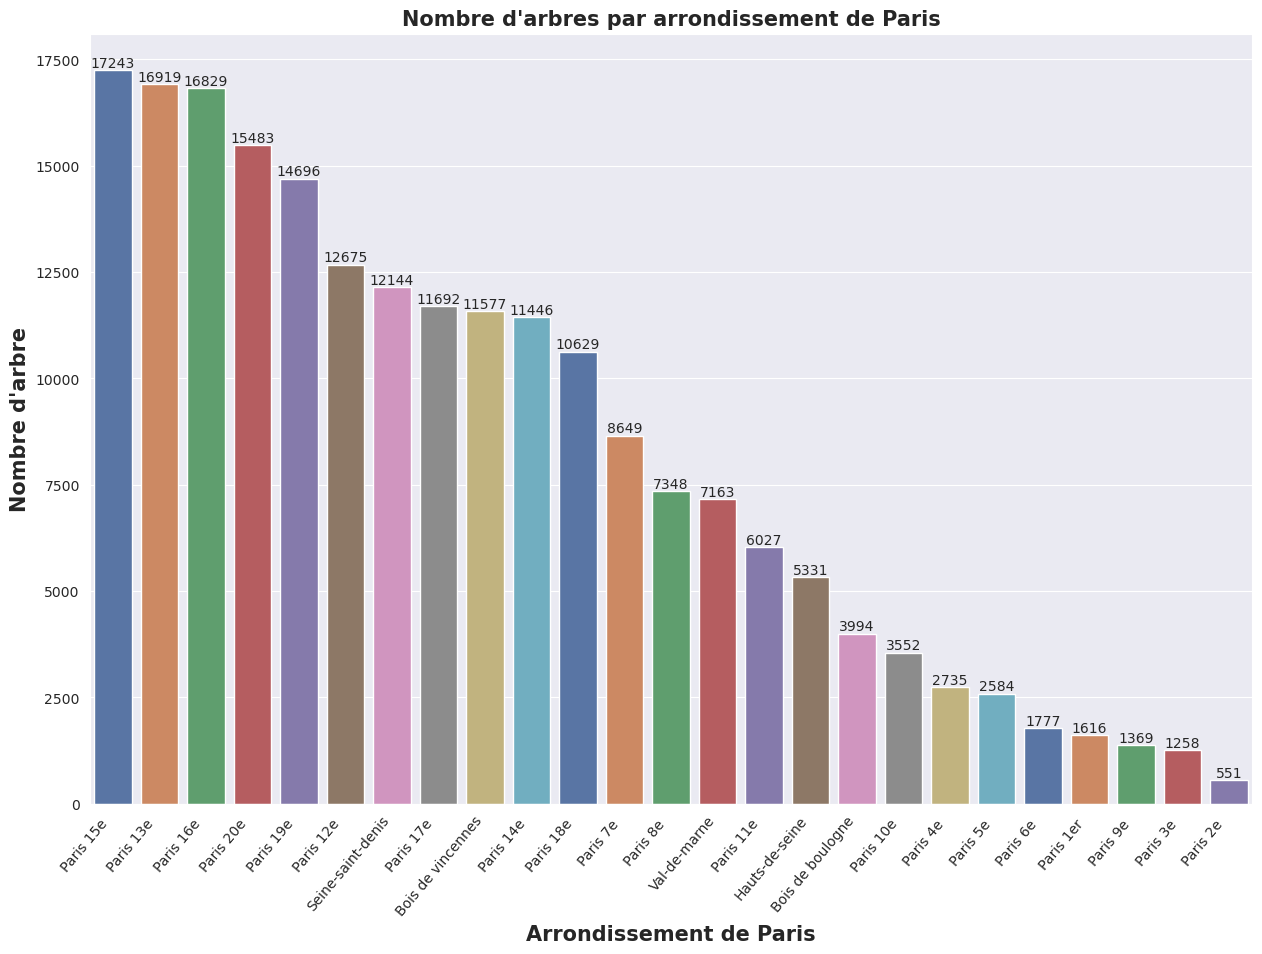

In [28]:
# Set theme
sns.set_style('darkgrid')
palette = sns.color_palette("deep")
# Set the figure size
plt.figure(figsize=(15, 10))
plot_nb_arbre = sns.countplot(x=df_arbre["arrondissement"],order=df_arbre["arrondissement"].value_counts().index,palette=palette)
# Add xlabel and ylabel change size,add bold
plt.ylabel("Nombre d'arbre",fontsize=15,weight='bold')
plt.xlabel('Arrondissement de Paris',fontsize=15,weight='bold')
# Rotate x-axis labels vertically
plot_nb_arbre.set_xticklabels(plot_nb_arbre.get_xticklabels(), rotation=50,
                        horizontalalignment='right',fontsize=10)
# Add title for the plot with bold
plt.title("Nombre d'arbres par arrondissement de Paris", weight='bold').set_fontsize('15')
# Add values on topbar 
for i in plot_nb_arbre.containers:
    plot_nb_arbre.bar_label(i,)
plt.show()

In [29]:
# Create series with condition values species > 3000
series_condtion_species = df_arbre['libellefrancais'].value_counts()[df_arbre['libellefrancais'].value_counts() > 3000]
df_arbre_condition_species = pd.DataFrame({"libellefrancais":series_condtion_species.index,'nombre_espece':series_condtion_species.values})

### Représentation des espèces d'arbres

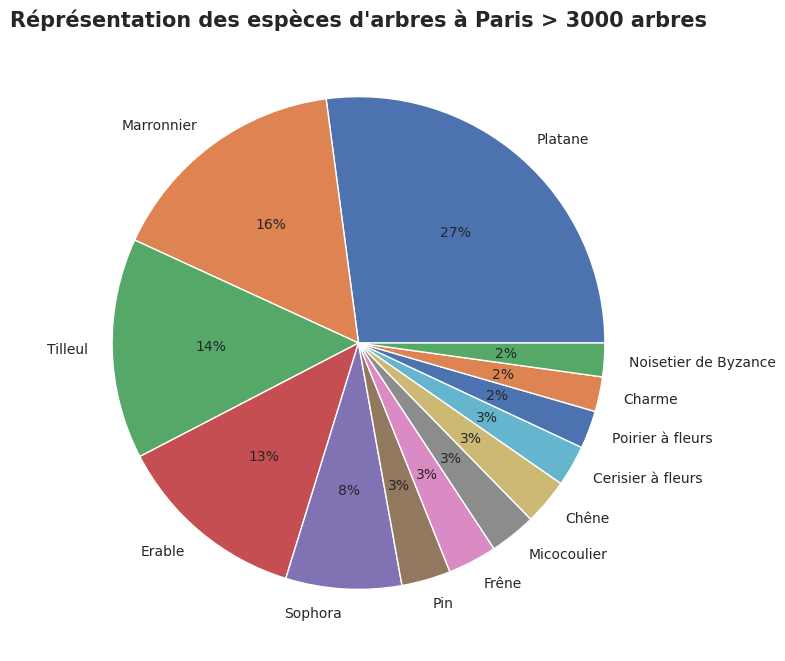

In [30]:
sns.set_style('darkgrid')
palette = sns.color_palette("deep")
plt.figure(figsize=(12, 8))
plt.pie(df_arbre_condition_species['nombre_espece'], labels = df_arbre_condition_species['libellefrancais'], colors = palette, autopct='%.0f%%')
plt.title("Réprésentation des espèces d'arbres à Paris > 3000 arbres",weight='bold').set_fontsize('15')
plt.show()

**Observation** : 
- Il existe plus de **197 espèces** d'arbre différentes à paris
- Le platane est l'arbre plus représenter à paris et dans ville en générale,cette arbre ornementale est très apprécié pour sa résistance à la taille et à la polution de l'air.Les platanes sont des arbres majestueux cependant, ces arbres emblématiques sont confrontés à une menace sérieuse connue sous le nom de "Chancre du Platane". Cette maladie fongique dévastatrice a un impact significatif sur la santé et la survie des platanes, nécessitant une attention particulière pour les préserver.La plupart des maladies n'attaque qu'une seule espèces d'arbre C’est pourquoi la concentration d’arbres d’une même espèce sur un même lieu favorise la propagation des épidémies.c'est pourquoi la mairie de paris a diversifier les essences d'arbres plantées et privilégies l'arternance d'essence dans les alignements d'arbre.
- diversification des espèces : un enjeux climatique.<br> 
Les enjeux liés au changement climatique imposent une adéquation de l’essence de plantation au risque d’épisodes caniculaires de plus en plus fréquents à moyen et long terme. En particulier, certaines essences méditerranéennes (telles que les micocouliers de Provence, les noisetiers de Byzance, les poiriers de Chine, les oliviers de Bohème ou les chênes verts) s’avèrent particulièrement bien adaptées aux sols et au climat parisiens.<br>
[source site de la ville de paris](https://www.paris.fr/pages/l-arbre-a-paris-199)

### Représentation par stade de développement

In [71]:
# Know the pourcentage of NaN values on the column
f"{df_arbre.stadedeveloppement.isna().mean().round(4) * 100}% de nos valeurs n'ont pas de stade de développement défini"


"22.71% de nos valeurs n'ont pas de stade de développement défini"

In [58]:
# Create series with condition values different of Nan
series_statut = df_arbre['stadedeveloppement'].value_counts()[df_arbre['stadedeveloppement'].value_counts() != 'NaN']
df_arbre_statut_developpement = pd.DataFrame({"stade_developpement_arbre":series_statut.index,'nb_arbres_developpement':series_statut.values})

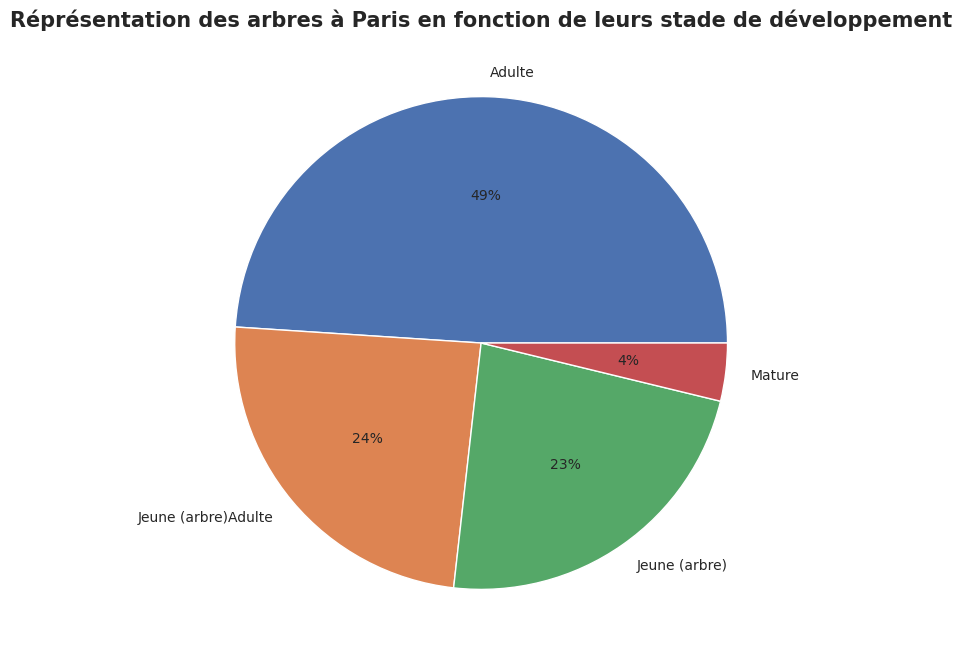

In [60]:
sns.set_style('darkgrid')
palette = sns.color_palette("deep")
plt.figure(figsize=(12, 8))
plt.pie(df_arbre_statut_developpement['nb_arbres_developpement'], labels = df_arbre_statut_developpement['stade_developpement_arbre'], colors = palette, autopct='%.0f%%')
plt.title("Réprésentation des arbres à Paris en fonction de leurs stade de développement",weight='bold').set_fontsize('15')
plt.show()

Grace a ce graphique on peut voir 47% pourcent des arbres à paris sont des jeunes arbres. Ce qui signifie qu'il y'a eu un renouvellement des arbres à paris

## <a id='toc1_4_'></a>[Analyse Cartographique](#toc0_)

In [31]:
df_arbre[['latitude', 'longitude']] = df_arbre['geo_point_2d'].str.split(',', expand=True).astype(float)

# Calculate the mean of latitude and longitude
mean_latitude = df_arbre['latitude'].mean()
mean_longitude = df_arbre['longitude'].mean()

# Print the mean values
print("Mean Latitude:", mean_latitude)
print("Mean Longitude:", mean_longitude)

Mean Latitude: 48.855202246992675
Mean Longitude: 2.3483500770891075


/tmp/ipykernel_21678/2914100007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbre[['latitude', 'longitude']] = df_arbre['geo_point_2d'].str.split(',', expand=True).astype(float)
/tmp/ipykernel_21678/2914100007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbre[['latitude', 'longitude']] = df_arbre['geo_point_2d'].str.split(',', expand=True).astype(float)


## Carte répartition des arbres par arrondissement

In [32]:
# Use API for read geojson dataset without downloading CSV files

# Define the API endpoint URL


api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/arrondissements/exports/geojson"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

     # Parse the JSON data from the response
    arrondissement_data = response.json()
    
else:
    print("Request failed with status code:", response.status_code)


<Response [200]>


In [33]:
# Create a dataframe from geojson to get the surface of each arrondissement of paris
geo_arrondissement = pd.DataFrame({
    "arrondissement" : [arr["properties"]["c_ar"] for arr in arrondissement_data["features"]], 
    "surface" : [arr["properties"]["surface"] for arr in arrondissement_data["features"]]
})
geo_arrondissement.sort_values(by='arrondissement',ascending=True,inplace=True)
display(geo_arrondissement)

,arrondissement,surface
3,1,1.824613e+06
15,2,9.911537e+05
13,3,1.170883e+06
0,4,1.600586e+06
11,5,2.539375e+06
9,6,2.153096e+06
19,7,4.090057e+06
17,8,3.880036e+06
4,9,2.178303e+06
2,10,2.891739e+06


In [34]:
# Display map with surface for each arrondissement
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = arrondissement_data)
carte

/home/dimitri/anaconda3/envs/projet_data_arbre/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
# Change name of arrondissement for match with geo_json arrondissement
df_arbre_arrondissement = df_arbre.groupby('arrondissement').size().reset_index(name='nombre_arbre')
df_arbre_arrondissement = pd.DataFrame(df_arbre_arrondissement, columns =['arrondissement','nombre_arbre']).sort_values(by='arrondissement')


In [36]:
display(df_arbre_arrondissement)

,arrondissement,nombre_arbre
0,Bois de boulogne,3994
1,Bois de vincennes,11577
2,Hauts-de-seine,5331
3,Paris 10e,3552
4,Paris 11e,6027
5,Paris 12e,12675
6,Paris 13e,16919
7,Paris 14e,11446
8,Paris 15e,17243
9,Paris 16e,16829


In [37]:
# Sum together value of tress to 16ème arrondissement and Bois de boulogne
arbre_16_arrondissement = df_arbre_arrondissement.loc[[0,9]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_16 = arbre_16_arrondissement.to_frame().transpose()
# Renname the value and append the new row from the dataframe 
df_16.loc[0, 'arrondissement'] = 'Paris 16e'
df_arbre_arrondissement = df_arbre_arrondissement.append(df_16,ignore_index=True)

# Make same thing for Bois de vincenne and 12ème arrondissement 
# Sum together value of trees to 16ème arrondissement and Bois de boulogne
arbre_12_arrondissement = df_arbre_arrondissement.loc[[1,5]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_12 = arbre_12_arrondissement.to_frame().transpose()
# Rename values 
df_12.loc[0, 'arrondissement'] = 'Paris 12e'
df_arbre_arrondissement = df_arbre_arrondissement.append(df_12,ignore_index=True)

/tmp/ipykernel_21678/3780292456.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arbre_arrondissement = df_arbre_arrondissement.append(df_16,ignore_index=True)
/tmp/ipykernel_21678/3780292456.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arbre_arrondissement = df_arbre_arrondissement.append(df_12,ignore_index=True)


In [38]:
# Drop rows outisde paris by index 
df_arbre_arrondissement = df_arbre_arrondissement.drop([0,1,2,9,23,24])

In [39]:
df_arbre_arrondissement.sort_values(by='arrondissement',ascending=True,inplace=True)
df_arbre_arrondissement['arrondissement'] = df_arbre_arrondissement['arrondissement'].str.extract(pat='(\d+)', expand=False)

In [51]:
# Display map for match two dataframe information 
carte = folium.Map(location = centre, zoom_start = 12)
folium.Choropleth(geo_data = arrondissement_data, name="choropleth",key_on = "feature.properties.c_ar",
                 data = df_arbre_arrondissement, columns = ["arrondissement", "nombre_arbre"],
                 fill_color= "YlGn",
                 legend_name = "Nombre d'arbre par arrondissement à Paris").add_to(carte)
carte

## Conclusion de l'analyse et pertinence du jeux de données